<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import mean_squared_error , r2_score, f1_score, accuracy_score
from xgboost import XGBClassifier , XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor

##### ✅ 1-1  EDA를 시행

In [34]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv',encoding= 'cp949')
df.head()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,26,1,20.1,81,5.80,4.36,0.86,0.90,2.43,12.0,63.8,5.40
1,40,1,17.7,54,4.60,3.70,1.02,1.50,2.04,9.2,70.3,4.10
2,40,2,19.7,53,5.30,5.87,1.29,1.75,3.37,10.1,61.1,4.85
3,43,1,23.1,71,4.50,4.05,0.74,1.27,2.60,36.5,73.4,5.30
4,36,1,26.5,82,5.54,6.69,3.49,0.91,3.64,69.3,67.5,5.53


,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4302.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,76.360446,5.226368,4.860732,1.588476,1.666765,2.976220,26.754810,71.557080,5.729084
std,14.686155,0.477530,3.397294,11.004056,0.781089,0.925484,1.260003,1.079377,0.892196,22.279922,16.937394,1.424568
min,22.000000,1.000000,15.600000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,4.860753,3.200000
25%,35.000000,1.000000,21.700000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,60.000000,4.900000
50%,46.000000,1.000000,24.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,72.000000,5.300000
75%,59.000000,2.000000,26.300000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,82.300000,6.020000
max,93.000000,2.000000,45.800000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,307.000000,29.700000


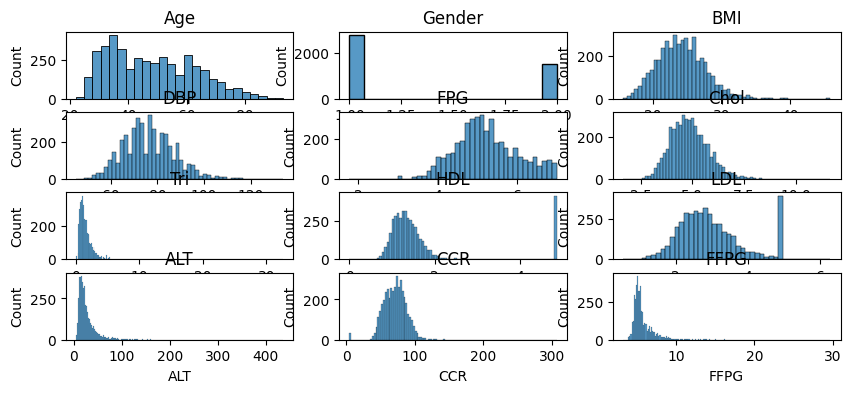


대부분의 데이터는 고르게 퍼져있는 형태로 존재하고 있으나, FPG, Chol, ALT, CRR은 한쪽으로 치우진 데이터의 형태를 띄고 있다. 
기술 통계량을 보았을 때, ALT의 표준편차는 22.28, 최대값이 436으로 이상치로 판단되어지며,CCR, FFPG 또한 이상치의 가능성이 존재한다. 
상관관계 분석을 통해 확인한 결과, LDL - CHol, HDL은 양의 상관관계를 자미ㅕ, Gender와 CCR의 경우는 음의 상관관계를 가지는데
남녀 간 CCR의 차이가 나타난다는것을 알 수 있다. 향후, 분석에서 이상치를 제거하거나, 정규화 또는 로그 변환을 통해 
데이터의 전처리가 필요해보인다. 



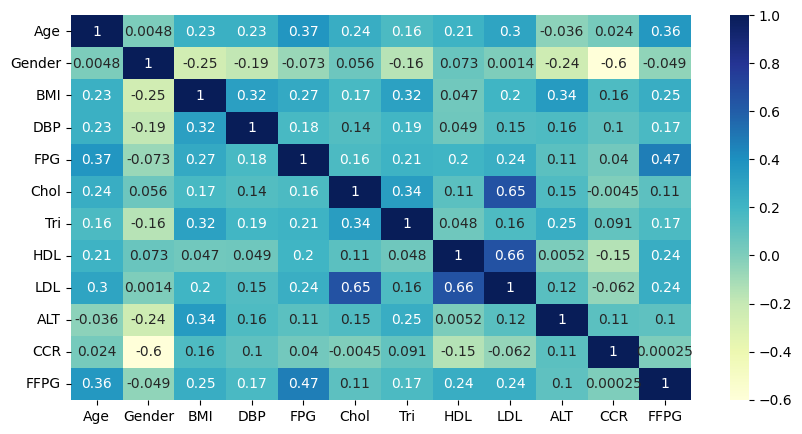

In [35]:
# 1) 통계량
display(df.describe())

# 2) 분포도 그림

fig, axes = plt.subplots(4, 3, figsize = (10, 4))

for i, axes in enumerate(axes.flat[: len(df.columns)]) :
  col_i = df.columns[i]
  sns.histplot(df[col_i], ax = axes)
  axes.set_title(col_i)

plt.show()

# 3) 상관관계 분석
cor_mat = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor_mat, cmap= 'YlGnBu' , annot = True)

print("""
대부분의 데이터는 고르게 퍼져있는 형태로 존재하고 있으나, FPG, Chol, ALT, CRR은 한쪽으로 치우진 데이터의 형태를 띄고 있다.
기술 통계량을 보았을 때, ALT의 표준편차는 22.28, 최대값이 436으로 이상치로 판단되어지며,CCR, FFPG 또한 이상치의 가능성이 존재한다.
상관관계 분석을 통해 확인한 결과, LDL - CHol, HDL은 양의 상관관계를 자미ㅕ, Gender와 CCR의 경우는 음의 상관관계를 가지는데
남녀 간 CCR의 차이가 나타난다는것을 알 수 있다. 향후, 분석에서 이상치를 제거하거나, 정규화 또는 로그 변환을 통해
데이터의 전처리가 필요해보인다.
""")

##### ✅ 1-2  데이터 전처리가 필요하다면 수행하고 이유를 작성

In [36]:
# 1) 이상치 처리

def remove_outlier(df) :
  df2 = df.copy()
  for col in df2.columns :
    iqr = df2[col].quantile(0.75) - df2[col].quantile(0.25)
    upper = 1.5 * iqr + df2[col].quantile(0.75)
    lower = 1.5 * iqr - df2[col].quantile(0.25)

    df2 =  df2[(df2[col] <= upper) & (df2[col] >= lower)]

  return df2

remove_outlier_df = remove_outlier(df)


# 2) Scaling
df3 = remove_outlier_df.copy()
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
y = df3['DBP']
x = df3.drop(columns = ['DBP'], axis = 1)

s_x = pd.DataFrame(ss.fit_transform(x), columns = x.columns)

print("""
데이터는 연속형 변수로 이루어져 있으며, 추후 분석을 위해 이상치 제거와 스케일링을 수행함
1) 이상치 제거
  - IQR를 사용하여, ALT, Tri, CCR에서 보여진 극단적인 이상치 값들을 모형의 안정성을 위해 제거
2) 스케일링
  - 평균 0, 표준편차 1이 되도록 스케일링을 수행함으로써, 변수간 단위 차이를 줄여, 특정 변수의 영향력이 과도하게 커지는 것을 방지
""")


데이터는 연속형 변수로 이루어져 있으며, 추후 분석을 위해 이상치 제거와 스케일링을 수행함 
1) 이상치 제거 
  - IQR를 사용하여, ALT, Tri, CCR에서 보여진 극단적인 이상치 값들을 모형의 안정성을 위해 제거 
2) 스케일링 
  - 평균 0, 표준편차 1이 되도록 스케일링을 수행함으로써, 변수간 단위 차이를 줄여, 특정 변수의 영향력이 과도하게 커지는 것을 방지 



##### ✅ 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

In [63]:
X_train, X_test, y_train, y_test = train_test_split(s_x, y, test_size = 0.3 ,random_state = 1234)

## 독립 표본 T검정
# 두 평균은 같다
# 두 평균은 같지 않다.
from scipy.stats import ttest_ind

stat, p_val = ttest_ind(y_train, y_test, equal_var = False)

if p_val < 0.05 :
  print(f'p_value :{p_val} - 귀무가설 기각 ')
else :
  print(f'p_value :{p_val} - 귀무가설 채택으로 두 평균은 같다, 즉 데이터가 분할이 잘 이루어짐을 나타낸다')

# 2) Count로
count = pd.DataFrame({
    'set' : ['train','test'] ,
    'count' : [y_train.count() , y_test.count() ]
    })

count['ratio'] = count['count'] / len(x)
print(count)

p_value :0.1728821735711939 - 귀무가설 채택으로 두 평균은 같다, 즉 데이터가 분할이 잘 이루어짐을 나타낸다
     set  count    ratio
0  train   1558  0.69991
1   test    668  0.30009


##### ✅ 1-4 독립변수의 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거

In [88]:
## 이상치를 제거한 데이터 셋으로 진행

# 1) 상관계수 확인
cor_df = df3.corr().unstack().reset_index()
over8 = cor_df[(cor_df['level_0'] != cor_df['level_1']) & (np.abs(cor_df.iloc[:,-1]) > 0.7)]
print(over8)
print("""
Chol 과 LDL은 높은 양의 상관계수가 있다. 이러한 변수쌍은 분석에 포함되는 경우, 중복된 정보로 간주 될 수 있다.
""")

    level_0 level_1         0
68     Chol     LDL  0.886817
101     LDL    Chol  0.886817



In [89]:
# 2) VIF

vif = pd.DataFrame()
vif['columns'] = df3.columns

vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
print(vif)
print("""
VIF 가 10 이상인 경우 매우 강한 다중공선성이 있는 것으로 간주 되어진다. 이는 여러 독립 변수들 사이에
강한 상관관계가 존재하는 현상을 의미한다. 다중 공선성이 높은 경우, 모형 해석이 어렵고, 회귀 계수의
신뢰도가 저하될 수 있다.

위의 상관분석과 VIF 을 통해 차원의 축소가 필요할 것으로 보여진다.
""")

   columns         VIF
0      Age   15.738849
1   Gender   13.993863
2      BMI   78.348957
3      DBP   58.206395
4      FPG   78.534013
5     Chol  246.468022
6      Tri    9.995531
7      HDL   32.331216
8      LDL  121.194800
9      ALT    7.783972
10     CCR   35.172576
11    FFPG   99.325735
 
VIF 가 10 이상인 경우 매우 강한 다중공선성이 있는 것으로 간주 되어진다. 이는 여러 독립 변수들 사이에 
강한 상관관계가 존재하는 현상을 의미한다. 다중 공선성이 높은 경우, 모형 해석이 어렵고, 회귀 계수의 
신뢰도가 저하될 수 있다. 

위의 상관분석과 VIF 을 통해 차원의 축소가 필요할 것으로 보여진다.



,0,1,2,3,4,5,6,7,8,9,10
ratio,0.222407,0.197012,0.151148,0.102607,0.078457,0.065681,0.059748,0.052725,0.035884,0.027019,0.007313
cumsum,0.222407,0.419419,0.570567,0.673174,0.751631,0.817312,0.877060,0.929785,0.965668,0.992687,1.000000


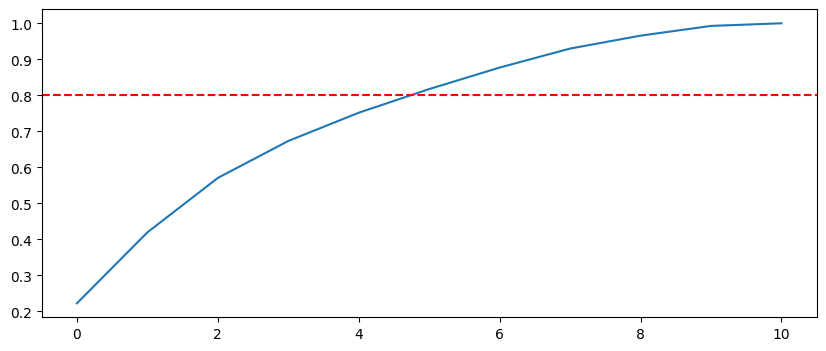

In [106]:
# 차원 축소
pca_x = df3.drop(columns = 'DBP', axis = 1)

pca_x = df3.drop(columns = 'DBP', axis = 1)
s_x = pd.DataFrame(ss.fit_transform(pca_x), columns = x.columns)

pca = PCA()
pca.fit(s_x)

pca_df = pd.DataFrame(
    {'ratio' : pca.explained_variance_ratio_,
     'cumsum' : pca.explained_variance_ratio_.cumsum()
    }
)
plt.figure(figsize = (10, 4))
plt.plot(pca_df.index, pca_df['cumsum'])
plt.axhline(0.8, linestyle = '--', color = 'red')
display(pca_df.T)

print("""
pca 분석 결과 6개의 주성분이 설명하는 분산 비율이 80%을 설명하기 때문에 PC5 까지의 데이터로 차원을 축소한다.
""")

In [110]:
## 차원 축소 후 X 재생성
pca = PCA(n_components= 6)
pca_6 = pca.fit_transform(s_x)

pca_x = pd.DataFrame(pca_6, columns = ['PC_' + str(x) for x in range(1,7)])

##### ✅ 1- 5  작업 후 데이터가 회귀분석의 기본가정 따르는지 설명

In [ ]:
print("""
회귀 분석의 기본가정
1) 선형성 : 독립변수와 종속변수 사이에 선형관계
2) 등분산성 : 오차항의 분산은 일정
3) 독립성 : 오차항들은 서로 독립ㅈ거이다
4) 정규성 : 잔차는 정규 분포를 따른다.
""")

In [119]:
import statsmodels.api as sm

xx = sm.add_constant(pca_x)
lr = sm.OLS(y.reset_index(drop = True), xx).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                    DBP   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     45.78
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           4.41e-53
Time:                        09:20:16   Log-Likelihood:                -8193.3
No. Observations:                2226   AIC:                         1.640e+04
Df Residuals:                    2219   BIC:                         1.644e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.4591      0.204    375.167      0.0

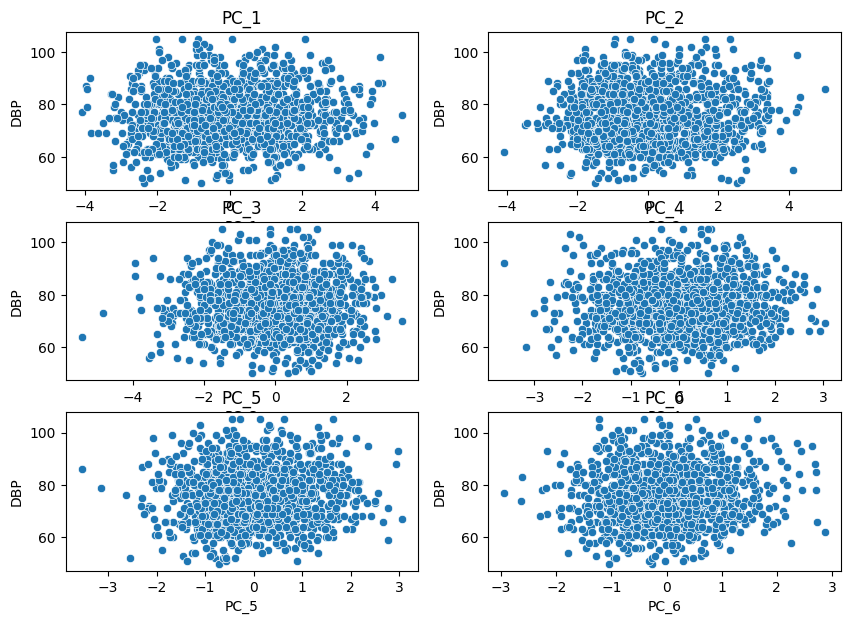


각 독립변수와 선형 관계 여부를 파악하기 위해 시각적으로 확인하기 위한 그래프 
점들이 직선 형태로 퍼져 있는 것은 선형성 가정을 충족한다고 할 수 있다. 



In [133]:
fig, axes = plt.subplots(3,2, figsize = (10,7))

for i , axes in enumerate(axes.flat[:len(pca_x.columns)]) :
  col_i = pca_x.columns[i]
  sns.scatterplot(x= pca_x[col_i], y = y , ax = axes)
  axes.set_title(col_i)

plt.show()
print("""
각 독립변수와 선형 관계 여부를 파악하기 위해 시각적으로 확인하기 위한 그래프
점들이 직선 형태로 퍼져 있는 것은 선형성 가정을 충족한다고 할 수 있다.
""")

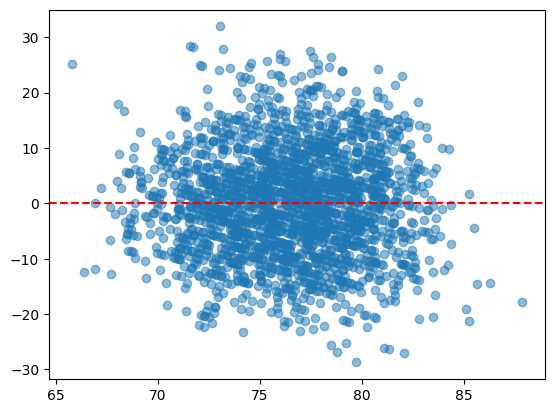

In [134]:
resid = lr.resid
fitted = lr.fittedvalues

#  등분산성 확인: 예측값 vs 잔차 플롯
plt.scatter(fitted, resid, alpha = 0.5)
plt.axhline(0, linestyle='--', color='red')


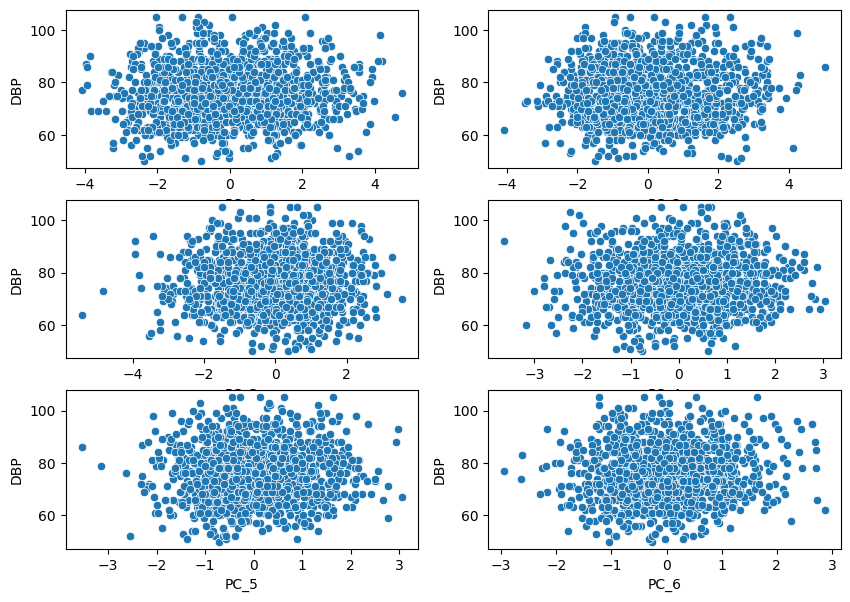

In [131]:
fig, axes = plt.subplots(3,2, figsize = (10,7))

for i , axes in enumerate(axes.flat[:len(pca_x.columns)]) :
  col_i = pca_x.columns[i]
  sns.scatterplot(x= pca_x[col_i], y = y , ax = axes)

In [137]:
# 독립성
# Durbin-Watson:                   2.053

# 등분산성
import statsmodels.stats.api as sms
stat, p_val , f_sta , f_pv = sms.het_breuschpagan(resid, lr.model.exog)
print(p_val) ## 8.514813229912212e-05

# p_val > 0.05 등분성 가정 만족

# 귀무 : 분산이 일정하다
# 대립 : 분산이 일정하지 않다.

8.514813229912212e-05


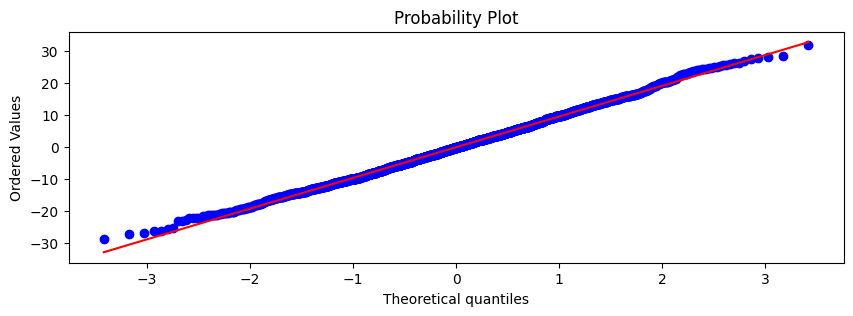

In [143]:
# 정규성 - QQ-plot
import scipy.stats as stats
fig, ax = plt.subplots(figsize  = (10, 3))
stats.probplot(resid, dist= 'norm', plot= ax)
plt.show()
# 잔차가 직선을 유지하면 정규성 가정이 만족된 것

##### ✅ 1- 6  회귀분석 알고리즘 3개를 선택하고 선정이유와 장단점

In [144]:
print('''
[SVM (Support Vector Machine)]
 > 특징
 - SVM은 분류(classification)와 회귀(regression) 모두에 사용될 수 있다.
 - SVM은 데이터의 비선형 관계를 잘 모델링할 수 있도록 커널 기법을 사용할 수 있다.
 - 주로 선형 커널, 다항식 커널, 또는 가우시안 RBF 커널을 사용한다.
 - 최대 마진을 활용하여 결정 경계를 찾으며, 이로 인해 일반화 성능이 뛰어나다.

 > 장점 :
 - SVM은 선형 및 비선형 분류 문제에서 우수한 성능을 보이며,
   이상치(outlier)에 대한 강한 저항력을 가진다.
 - 다양한 커널 함수를 사용하여 다양한 데이터 유형에 대응할 수 있다.
 - SVM은 최대 마진을 추구하므로 일반화 성능이 우수하다.

 > 단점
 - SVM은 데이터의 스케일에 민감하므로 데이터 전처리가 중요하다.
 - 대용량 데이터셋에서는 계산 비용이 높을 수 있으며, 학습 시간이 오래 걸릴 수 있다.


[XGBoost (eXtreme Gradient Boosting)]
 > 특징
 - XGBoost는 트리 기반의 앙상블 학습 모델로, 그라디언트 부스팅(Gradient Boosting)을 기반으로 하며,
 과적합을 줄이기 위한 정규화와 가지치기 기능을 포함하고 있다.
 - 속도와 성능 면에서 우수하며, 다양한 분류 및 회귀 문제에 적용할 수 있다.
 - 특징 중요도 (변수 중요도)를 계산하여 변수 선택과 모델 해석에 용이하다.

 > 장점
 - XGBoost는 많은 데이터 경진 대회에서 우승을 차지하며, 다양한 데이터 유형에서 뛰어난 성능을 보인다.
 - 회귀, 분류, 랭킹, 예측 문제에 대한 다양한 손실 함수를 제공한다.
 - 정규화와 가지치기 기능을 통해 과적합을 줄일 수 있다.

 > 단점
 - 적절한 하이퍼파라미터를 선택하고 튜닝하는데 시간과 노력이 필요하다.
 - 메모리 요구량이 크고, 대용량 데이터에 대한 학습 및 예측 시간이 오래 걸릴 수 있다.


[RandomForest]
 > 특징
 - RandomForest는 의사결정 트리(Decision Tree)를 기반으로 하는 앙상블 학습 모델이다.
 - 여러 개의 의사결정 트리를 생성하고
   각 트리의 예측 결과를 결합하여 안정적이고 강력한 예측을 제공한다.
 - 과적합을 줄이기 위한 부트스트랩 샘플링과 무작위 특성 선택을 사용한다.

 > 장점
 - RandomForest는 과적합을 피하면서 좋은 예측 성능을 제공할 수 있다.
 - 특징 중요도 (변수 중요도) 를 평가하고 모델 해석에 용이하다.
 - 분류 및 회귀 문제 등 다양한 데이터에 널리 사용가능하다.

 > 단점
 - 트리의 개수가 많을수록 모델이 복잡해져 과적합 가능성이 높아질 수 있다.
   (학습데이터셋에 과대적합) 하이퍼파라미터를 조절하여 이를 방지하려는 노력을 해야한다.
 - RandomForest는 다수의 트리를 결합하여 예측을 수행하므로 개별 트리 해석이 어렵다.
''')


[SVM (Support Vector Machine)]
 > 특징
 - SVM은 분류(classification)와 회귀(regression) 모두에 사용될 수 있다.
 - SVM은 데이터의 비선형 관계를 잘 모델링할 수 있도록 커널 기법을 사용할 수 있다. 
 - 주로 선형 커널, 다항식 커널, 또는 가우시안 RBF 커널을 사용한다.
 - 최대 마진을 활용하여 결정 경계를 찾으며, 이로 인해 일반화 성능이 뛰어나다.

 > 장점 :
 - SVM은 선형 및 비선형 분류 문제에서 우수한 성능을 보이며, 
   이상치(outlier)에 대한 강한 저항력을 가진다.
 - 다양한 커널 함수를 사용하여 다양한 데이터 유형에 대응할 수 있다.
 - SVM은 최대 마진을 추구하므로 일반화 성능이 우수하다.

 > 단점
 - SVM은 데이터의 스케일에 민감하므로 데이터 전처리가 중요하다.
 - 대용량 데이터셋에서는 계산 비용이 높을 수 있으며, 학습 시간이 오래 걸릴 수 있다.
 
 
[XGBoost (eXtreme Gradient Boosting)]
 > 특징
 - XGBoost는 트리 기반의 앙상블 학습 모델로, 그라디언트 부스팅(Gradient Boosting)을 기반으로 하며,
 과적합을 줄이기 위한 정규화와 가지치기 기능을 포함하고 있다.
 - 속도와 성능 면에서 우수하며, 다양한 분류 및 회귀 문제에 적용할 수 있다.
 - 특징 중요도 (변수 중요도)를 계산하여 변수 선택과 모델 해석에 용이하다.

 > 장점
 - XGBoost는 많은 데이터 경진 대회에서 우승을 차지하며, 다양한 데이터 유형에서 뛰어난 성능을 보인다.
 - 회귀, 분류, 랭킹, 예측 문제에 대한 다양한 손실 함수를 제공한다.
 - 정규화와 가지치기 기능을 통해 과적합을 줄일 수 있다.

 > 단점
 - 적절한 하이퍼파라미터를 선택하고 튜닝하는데 시간과 노력이 필요하다.
 - 메모리 요구량이 크고, 대용량 데이터에 대한 학습 및 예측 시간이 오래 걸릴 수 있다.


[RandomForest]
 

In [150]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


def modelling(model, name) :
  x_train, x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.3, random_state = 134)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  MSE = np.sqrt(mean_squared_error(y_test, pred))
  r2 = r2_score(y_test, pred)

  return MSE, r2


res = []
for name, model  in [['SVR' , SVR()], ['XGB', XGBRegressor()],['Random_Forest',RandomForestRegressor(random_state = 44)]] :
  MSE, r2 = modelling(model, name)
  res.append([name, MSE, r2])

display(pd.DataFrame(res, columns = ['name', 'MSE','r2']))



,name,MSE,r2
0,SVR,9.638175,0.101302
1,XGB,10.650447,-0.097386
2,Random_Forest,9.761046,0.078243


##### ✅ 1-7 가장 최적화된 알고리즘을 이용하여 K-Fold 교차검증을 수행

In [156]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle = True, random_state = 45)

# ✅ cross_val_score()는 전체 X, y 데이터
score = cross_val_score(SVR(), pca_x, y,  scoring= 'neg_mean_squared_error', cv = kfold,)

MSE = -score
display(pd.DataFrame({'Fold_Number' : range(1, len(MSE) + 1),
             'MSE' : MSE}))
print(MSE.mean())
print('''
성능이 가장 우수한 SVR 모델로 5-Fold 교차 검증을 수행
SVR 모델은 데이터에 따라 일정한 성능을 유지하며 각 Fold별로 MSE의 차이가 크지 않다.
이는 과적합 없이 안정적인 성능을 보인다는 것을 나타낸다.
''')

,Fold_Number,MSE
0,1,93.979076
1,2,84.611618
2,3,91.034267
3,4,95.362592
4,5,96.269996


92.2515098045635

성능이 가장 우수한 SVR 모델로 5-Fold 교차 검증을 수행 
SVR 모델은 데이터에 따라 일정한 성능을 유지하며 각 Fold별로 MSE의 차이가 크지 않다. 
이는 과적합 없이 안정적인 성능을 보인다는 것을 나타낸다.



##### ✅ 2-1. 발생시각을 통해 평일인지 주말인지를 구분하는 '주말여부' 범주형 변수 추가하고 데이터 분포를 확인하라. </br> (월 ~ 금은 평일, 토요일과 일요일을 주말)

    대상사고 : 해당 1년간 발생한 가해 또는 피해차종이 자전거인 교통사고
    다발지역 선정조건 : 반경 300m 내 대상사고 4건이상 발생지역
    종속 변수 : 피해자신체상해정도

In [263]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv',encoding='cp949')
df.head(3)


,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각
0,경상,여,75세,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15시
1,중상,여,26세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13시
2,중상,남,34세,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08시


In [264]:
# 결측치 처리
df = df.dropna()

In [269]:
df['발생시각'] = pd.to_datetime(df['발생시각'], format = '%Y-%m-%d %H시')

# 5,6 토요일, 일요일
df['주말여부'] = df['발생시각'].apply(lambda x : '주말' if x.dayofweek >= 5 else '평일')
df.head()

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,주말여부
0,경상,여,75세,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15:00:00,평일
1,중상,여,26세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13:00:00,주말
2,중상,남,34세,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08:00:00,평일
3,경상,남,45세,자전거,경상,차대차 - 기타,맑음,0,2018-06-03 18:00:00,주말
4,중상,남,20세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-06-28 16:00:00,평일


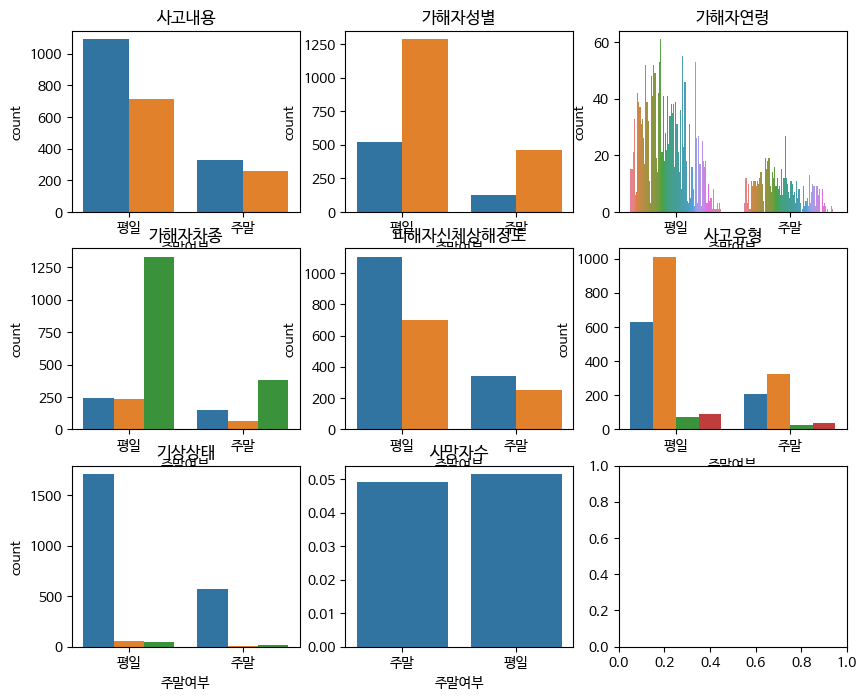

In [270]:

fig, axes = plt.subplots(3, 3, figsize = (10, 8))

for i, axes in enumerate(axes.flat[: len(df.columns.difference(['발생시각', '주말여부']))]):
  col_i = df.columns[i]
  if col_i == '사망자수' :
    target = df[[col_i, '주말여부']].groupby('주말여부')[col_i].mean()
    sns.barplot(x = target.index, y = target.values, ax = axes)



  else :
    sns.countplot(x = '주말여부', hue = col_i, data = df, ax= axes)

  axes.set_title(col_i)  # Set the column name as the title
  axes.legend_.remove() if axes.legend_ is not None else None

plt.legend().remove()
plt.show()

##### ✅ 2-2 주말여부에 따라 각 변수들(사고내용,가해자성별,가해자연령,기상상태,사고유형)이 유의한지 통계적 검정

In [271]:
# 나이 처리
df['가해자연령'] = df['가해자연령'].str.split('세').str[0]

# 사고 유형
df['사고유형_1'] = df['사고유형'].str.split('-').str[0]
df['사고유형_2'] = df['사고유형'].str.split('-').str[1]



In [285]:
from scipy.stats import ttest_ind, chi2_contingency


check_col = ['사고내용', '가해자성별', '가해자연령',  '가해자차종', '기상상태', '피해자신체상해정도', '사고유형']
res = []
for col in check_col :
  cross = pd.crosstab(df[col], df['주말여부'])
  stat, p_val, dof, expected = chi2_contingency(cross)
  res.append([col, p_val])

res = pd.DataFrame(res, columns = ['col','p_val'])
res['유의'] = res['p_val'].apply(lambda x : '유의' if x < 0.05 else '유의하지않음')

print(res)
print('''
주말 여부에 따라 사고내용,가해자성별,가해자연령,기상상태,사고유형의 컬럼이 통계적으로 유의미한 차이를 보이는지 확인 하기 위해서
카이제곱 독립성 검정을 수행한다. 가해자 성별, 기상상태는 주말 여부에 따라 분포에 유의미한 차이가 있음을 나타낸다.
''')

         col         p_val      유의
0       사고내용  5.069386e-02  유의하지않음
1      가해자성별  5.436576e-04      유의
2      가해자연령  3.557885e-01  유의하지않음
3      가해자차종  8.450019e-11      유의
4       기상상태  5.675179e-02  유의하지않음
5  피해자신체상해정도  1.115785e-01  유의하지않음
6       사고유형  7.041764e-01  유의하지않음

주말 여부에 따라 사고내용,가해자성별,가해자연령,기상상태,사고유형의 컬럼이 통계적으로 유의미한 차이를 보이는지 확인 하기 위해서
카이제곱 독립성 검정을 수행한다. 가해자 성별, 기상상태는 주말 여부에 따라 분포에 유의미한 차이가 있음을 나타낸다. 



##### ✅ 2-3 유의한 변수들만을 가지고 '피해자신체상해정도'를 기준으로 SMOTE 오버샘플링을 수행하고 샘플링 데이터와 기존데이터를 합친 전체 데이터에 대해 범주형변수는 변수별 빈도를 나타내고 연속형이면 평균을 나타내시오

In [303]:
df1 = df[['가해자성별','가해자차종' ,'피해자신체상해정도']]

la = LabelEncoder()
for col in df1.columns :
  df1[col] = la.fit_transform(df1[col])

# df1 = 라벨 인코딩 적용
x = df1[['가해자성별','가해자차종']]
y = df1['피해자신체상해정도']


from imblearn.over_sampling import SMOTE
smote = SMOTE()
sm_x , sm_y = smote.fit_resample(x, y)


sum_x = pd.concat([x, sm_x], axis = 0)
sum_y = pd.concat([y, sm_y], axis = 0)

print(sum_x['가해자성별'].value_counts())
print(sum_x['가해자차종'].value_counts())
print(sum_y.value_counts())

가해자성별
0    3863
1    1419
Name: count, dtype: int64
가해자차종
0    3792
1     832
2     658
Name: count, dtype: int64
피해자신체상해정도
0    2886
1    2396
Name: count, dtype: int64


In [281]:
# df['피해자신체상해정도'].unique()['경상', '중상'],
df.columns

Index(['사고내용', '가해자성별', '가해자연령', '가해자차종', '피해자신체상해정도', '사고유형', '기상상태', '사망자수',
       '발생시각', '주말여부', '사고유형_1', '사고유형_2'],
      dtype='object')

##### ✅ 2- 4 로지스틱회귀분석, XGB 분류모델을 이용하여 모델링하고, 영향도 있는 변수를 확인하기

In [330]:
cols = ['사고내용', '가해자성별', '가해자연령', '가해자차종', '피해자신체상해정도', '기상상태', '사망자수', '주말여부', '사고유형_1', '사고유형_2']

df2 = df[cols]

for col in df2.columns :
  la = LabelEncoder()
  df2[col] =la.fit_transform(df2[col])


X = df2.drop(columns = ['피해자신체상해정도'], axis = 1)
y = df2['피해자신체상해정도']


def modelling (model, name) :
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  f1 = f1_score(y_test, pred, average = 'macro')
  acc = accuracy_score(y_test, pred)

  return f1, acc

res = []
model_lst = []
for name, model in [['Logistic' , LogisticRegression(max_iter=500)] , ['xgb' , XGBClassifier()]] :
  f1, acc = modelling(model, name)
  res.append([name, f1, acc])
  model_lst.append([name, model])

print(res)

[['Logistic', 0.995615826925774, 0.9958275382475661], ['xgb', 0.9941506671005532, 0.9944367176634215]]


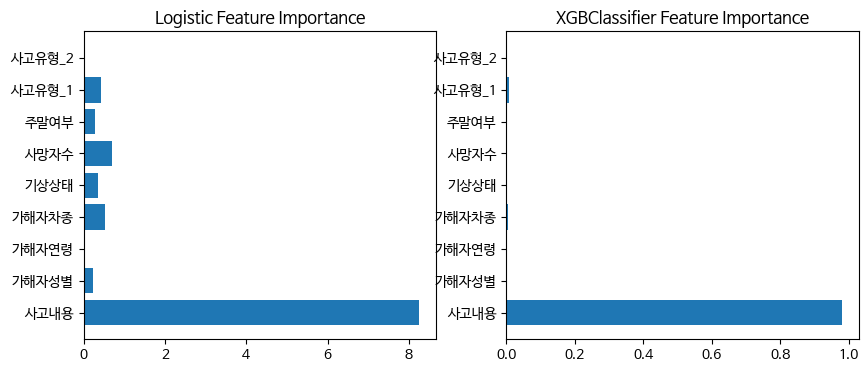

In [343]:

fig, axes = plt.subplots(1,2, figsize = (10, 4))

for name, model in model_lst :
  if name == 'Logistic' :
    logi_importance = np.abs(model.coef_[0])
    logi_featuers = X.columns
    axes[0].barh(logi_featuers, logi_importance)
    axes[0].set_title('Logistic Feature Importance')


  elif  name == 'xgb':
    importance = model.feature_importances_
    features = model.feature_names_in_
    axes[1].barh(features, importance)
    axes[1].set_title('XGBClassifier Feature Importance')

📊 통계분석
##### ✅ 1. 연령대별로 헤드셋 선호도에 차이가 있는지를 검정하기 위한 귀무가설과 연구가설을 설정

In [352]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv')

# 3개 연령층 (청년 장년 노년)의 A 헤드셋의 선호도 (1,2,3/ 범주형) 설문조사
# df['나이'].value_counts()

tab = pd.crosstab(df['나이'], df['선호도'])
stat, p_val, dof , expected = chi2_contingency(tab)
print(p_val)

print('''
귀무 가설 : 연령대별로 헤드셋 선호도에 차이가 없다.
대립 가설 : 연령대별로 헤드셋 선호도에 차이가 있다.
''')
if p_val < 0.05 :
  print('연령대별로 헤드셋 선호도에 차이가 있다.')
else :
  print('연령대별로 헤드셋 선호도에 차이가 없다')

0.9919538273457956

귀무 가설 : 연령대별로 헤드셋 선호도에 차이가 없다. 
대립 가설 : 연령대별로 헤드셋 선호도에 차이가 있다. 

연령대별로 헤드셋 선호도에 차이가 없다


##### ✅ 2.  아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5 </br> 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라

In [362]:
from scipy.stats import binom

# 딸이 4명 이상인 가구가 3가족
n = 6
p = 0.5

rv = binom(n, p)

# 1) 아이 6명 중 딸이 4명인 경우
d_4 = 1 - rv.cdf(3)
print(f'아이 6명 중 딸이 4명인 경우 {d_4}')

# 2) 가족이 5가족 인데, 가구가 3 가족 이상일때
rv2 = binom(5, d_4)
family_3 = 1 - rv2.cdf(2)

print(f'가족이 5가족 인데, 가구가 3 가족 이상일때 {family_3}')

아이 6명 중 딸이 4명인 경우 0.34375
가족이 5가족 인데, 가구가 3 가족 이상일때 0.2255459427833557


##### ✅ 2. 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가?

In [365]:
# 아이 = 6, 딸 = 0.5
rv = binom(6, 0.5)
# 딸이 4명 이상
d_4_more = 1 - rv.cdf(3)

# 5가족 중 기대되는 수 : 총 시행수 x 성공 횟수
print(d_4_more * 5)

1.71875


##### ✅ 3개의 3개의 공장이 있고, 3개의 지역이 있습니다. 각 공장에서 각 지역으로 제품을 보내는 비용과 생산 가능 수량 및 각 지역의 수요량이 다음과 같습니다.

공장Z	7만원	4만원	11만원	30
목표는 공장 X, Y, Z에서 각 지역으로 제품을 보내는 최소 배송 비용을 구하는 것입니다.

* 제약 조건:
* 공장 X: 최대 40개 생산 가능
* 공장 Y: 최대 50개 생산 가능
* 공장 Z: 최대 30개 생산 가능
* 지역 1: 30개의 제품 필요
* 지역 2: 50개의 제품 필요
* 지역 3: 20개의 제품 필요공장에서 생산한 제품을 3지역으로 가능한 조건에 맞게 최대로 배송한다.
* 각 공장과 각 지역 사이의 1개 제품 배송 비용이 아래와 같을 때, 최소 배송 비용은 얼마인가?

In [381]:
from scipy.optimize import linprog

costs = [
    [8, 6, 10],  # 공장X -> 지역1, 지역2, 지역3
    [9, 12, 8],  # 공장Y -> 지역1, 지역2, 지역3
    [7, 4, 11],  # 공장Z -> 지역1, 지역2, 지역3
]


# 공장별 최대 생산량 제약 조건 (행 단위)
A_ub = np.zeros((3, 9))
limits = [40, 50, 30]  # 공장 X, Y, Z 최대 생산 가능량

for i in range(3):  # 각 공장별
    A_ub[i, i*3:(i+1)*3] = 1



# 지역별 수요량을 만족하는 평등 조건 (열 단위)
A_eq = np.zeros((3, 9))
demand = [30, 50, 20]  # 지역 1, 2, 3 수요

for j in range(3):  # 각 지역별
    A_eq[j, j::3] = 1

bounds = [(0, None) for _ in range(9)]

res = linprog(c, A_ub=A_ub, b_ub=limits, A_eq=A_eq, b_eq=demand, bounds=bounds, method='highs')
res.fun

650.0